In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
from matplotlib.pyplot import figure

In [6]:
matches=pd.read_csv('C:\\Users\\NOMESH\\Downloads\\Project\matches.csv')

In [7]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
matches['team1'].nunique()

15

In [9]:
matches['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
matches['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [11]:
#replacing duplicates with one common value
matches['team1'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['team2'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['winner'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['toss_winner'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)

In [12]:
#dropping null values
matches['winner'].dropna(inplace=True)

In [13]:
matches['venue'].nunique()

41

In [14]:
#Cleaning venue column
(matches['venue'].replace({'ACA-VDCA Stadium':'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
                            'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi Intl. Cricket Stadium',
                            'IS Bindra Stadium':'Punjab Cricket Association IS Bindra Stadium, Mohali',
                            'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                            'Feroz Shah Kotla':'Feroz Shah Kotla Ground',
                            'M. A. Chidambaram Stadium':'MA Chidambaram Stadium, Chepauk'},inplace=True))

In [15]:
matches['venue'].nunique()

35

In [16]:
#encoder
encoder= LabelEncoder()
matches["team1"]=encoder.fit_transform(matches["team1"])
matches["team2"]=encoder.fit_transform(matches["team2"])
matches["winner"]=encoder.fit_transform(matches["winner"].astype(str))
matches["toss_winner"]=encoder.fit_transform(matches["toss_winner"])
matches["venue"]=encoder.fit_transform(matches["venue"])


In [17]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,13,12,12,field,normal,0,13,35,0,Yuvraj Singh,23,AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,8,11,11,field,normal,0,11,0,7,SPD Smith,16,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,4,7,7,field,normal,0,7,0,10,CA Lynn,25,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,11,5,5,field,normal,0,5,0,6,GJ Maxwell,11,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,12,3,12,bat,normal,0,12,15,0,KM Jadhav,14,NaN,NaN,NaN


In [18]:
#outcome variable as a probability of team1 winning
matches.loc[matches["winner"]==matches["team1"],"team1_win"]=1
matches.loc[matches["winner"]!=matches["team1"],"team1_win"]=0

In [19]:
matches.loc[matches["toss_winner"]==matches["team1"],"team1_toss_win"]=1
matches.loc[matches["toss_winner"]!=matches["team1"],"team1_toss_win"]=0

In [20]:
matches["team1_bat"]=0
matches.loc[(matches["team1_toss_win"]==1) & (matches["toss_decision"]=="bat"),"team1_bat"]=1

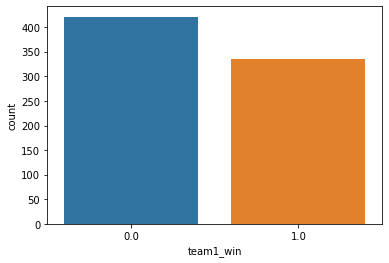

In [21]:
#Checking for the distribution of the dataset
sns.countplot(x="team1_win",data=matches)
plt.show()

In [22]:
prediction_df=matches[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]

In [23]:
#dropping higly correlated features
correlated_features = set()
correlation_matrix = prediction_df.corr()
correlation_matrix

,team1,team2,team1_toss_win,team1_bat,team1_win,venue
team1,1.000000,-0.107006,-0.119418,-0.119418,-0.018771,0.111711
team2,-0.107006,1.000000,-0.010893,-0.010893,-0.012569,0.082284
team1_toss_win,-0.119418,-0.010893,1.000000,1.000000,0.022766,0.036648
team1_bat,-0.119418,-0.010893,1.000000,1.000000,0.022766,0.036648
team1_win,-0.018771,-0.012569,0.022766,0.022766,1.000000,0.011777
venue,0.111711,0.082284,0.036648,0.036648,0.011777,1.000000


In [24]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

prediction_df.drop(columns=correlated_features)

,team1,team2,team1_toss_win,team1_win,venue
0,13,12,0.0,1.0,23
1,8,11,0.0,0.0,16
2,4,7,0.0,0.0,25
3,11,5,0.0,0.0,11
4,12,3,1.0,1.0,14
...,...,...,...,...,...
751,7,8,0.0,0.0,34
752,0,8,1.0,0.0,15
753,13,2,0.0,0.0,5
754,2,0,0.0,0.0,5


In [140]:
#feature selection
X = prediction_df.drop('team1_win', axis=1)
target = prediction_df['team1_win']
target=target.astype(int)

In [60]:
logReg=LogisticRegression(solver='lbfgs')
rfe = RFE(logReg, 20)
rfe = rfe.fit(X, target.values.ravel())
#Checking for the features of they are important
print(rfe.support_)

[ True  True  True  True  True]


C:\Users\NOMESH\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [61]:
#Splitting the data into training and testing data and scaling it
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.25, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Evaluating logistic regression, decission tree and random forest without using cross validation technique 

In [62]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

[[102   4]
 [ 82   1]]
Accuracy of logistic regression classifier on test set: 0.5538
Accuracy of logistic regression classifier on test set: 0.5450


In [64]:
#Decision Tree Classifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(dtree.score(X_train, y_train)))
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))

[[70 36]
 [51 32]]
Accuracy of decision tree classifier on test set: 0.8854
Accuracy of decision tree classifier on test set: 0.5397


In [65]:
#Random Forest Classifier
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
randomForest.score(X_test,y_test)
y_pred = randomForest.predict(X_test)
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print('Accuracy of random forest classifier on train set: {:.4f}'.format(randomForest.score(X_train, y_train)))
print('Accuracy of random forest classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))

Confusion matrix
 [[67 39]
 [50 33]]
Accuracy of random forest classifier on train set: 0.8854
Accuracy of random forest classifier on test set: 0.5291


# Evaluating logistic regression, decission tree and random forest using cross validation technique 

In [25]:
X = prediction_df.drop('team1_win', axis=1)
target = prediction_df['team1_win']
target=target.astype(int)

In [67]:
# random forest model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=3, shuffle=True)
# create model
model = RandomForestClassifier(n_estimators=100)
# evaluate mode1
scores = cross_val_score(model, X, target, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.552 (0.040)


In [69]:
# random forest model using Repeated k-Fold Cross-Validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=20, n_repeats=4, random_state=1)
# create model
model = RandomForestClassifier(n_estimators=100)
# evaluate mode1
scores = cross_val_score(model, X, target, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.551 (0.101)


In [70]:
# decission tree model using Repeated k-Fold Cross-Validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=20, n_repeats=4, random_state=1)
# create model
model = DecisionTreeClassifier()
# evaluate mode1
scores = cross_val_score(model, X, target, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.559 (0.098)


In [71]:
# logistic regression model using Repeated k-Fold Cross-Validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=20, n_repeats=4, random_state=1)
# create model
model = LogisticRegression()
# evaluate mode1
scores = cross_val_score(model, X, target, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.555 (0.074)
